evaluate the mono energetic case...

In [1]:
# own skrips
import helperfile as hf
# generalls libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import uproot
from tensorflow.keras.optimizers import Adam
import time
from scipy.optimize import curve_fit
from matplotlib.colors import LogNorm
import keras.backend as k

In [10]:
rootfile = uproot.open('./stage4_clusters_monoE.root')
ipd = hf.InputData_2photon(rootfile, sort_cond='none', min_dist=4)
ipd.form_cluster()
ipd.train_test_split()
ipd.prep_trainingsdata()
ipd.prep_verificationdata()

Initialized object
Cutted  223491  clusters due to photon pair with distance smaller than  4  cm.
Start shaping clusters in a  (9, 9)  grid...
Shaping the clusters took  65.25000405311584 s
Splitted data into training and test set!
Prepared 'veri_truth' data
Prepared 'veri_fit' data (Lednev fit from coral)


In [11]:
def loss_flip(y_true, y_pred):
    mse = k.sum(k.square(y_true - y_pred), axis=1)
    y_pred_flipped = tf.roll(y_pred, 3, axis=1)
    mse_flipped = k.sum(k.square(y_true - y_pred_flipped), axis=1)
    vec = tf.stack([mse, mse_flipped], axis=1)
    loss = k.min(vec, axis=1)
    return loss

In [12]:
model= keras.models.load_model('./models/model_st4_monoE_custom_loss', custom_objects={'loss_flip': loss_flip})
output = model.predict(ipd.clusters_v)
output_flipped = np.roll(output, 3, axis=1)
mse = np.mean(np.square(output-ipd.veri_truth), axis=1)
mse_flipped = np.mean(np.square(output_flipped-ipd.veri_truth), axis=1)
ind_flip = np.where(mse_flipped<mse)
output[ind_flip] = np.roll(output[ind_flip], 3, axis=1)
ev = hf.Evaluation_2photon(ipd, output) # create object to help with evaluation

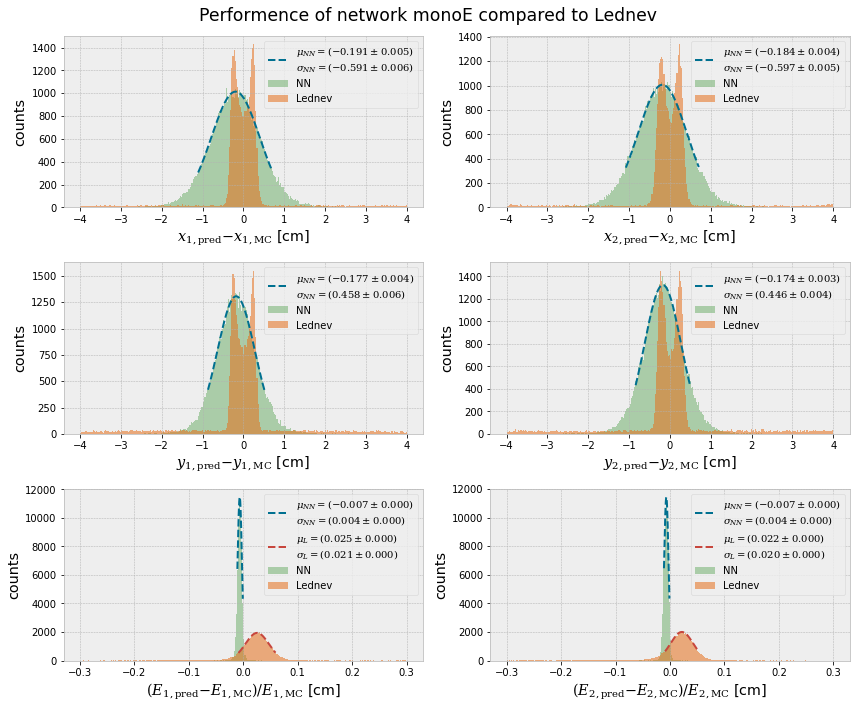

In [16]:
fit_param = ev.show_hist_NN_withLednev(figsave=(False, "network monoE"))

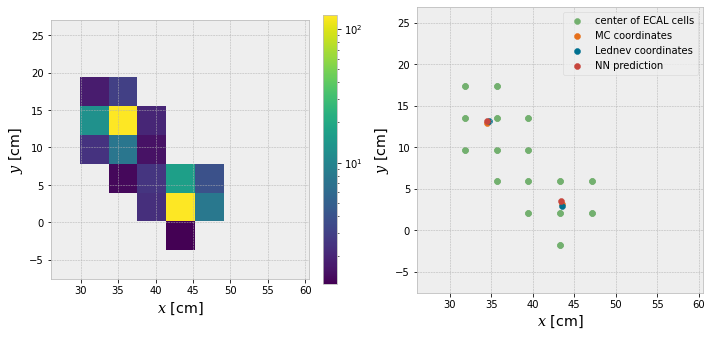

[80.01488488 80.08200615]


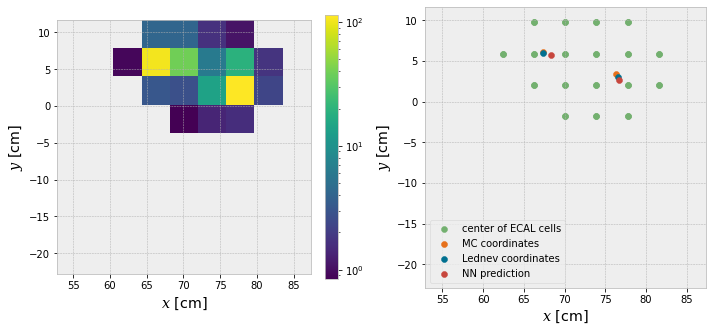

[80.07041778 80.0455538 ]


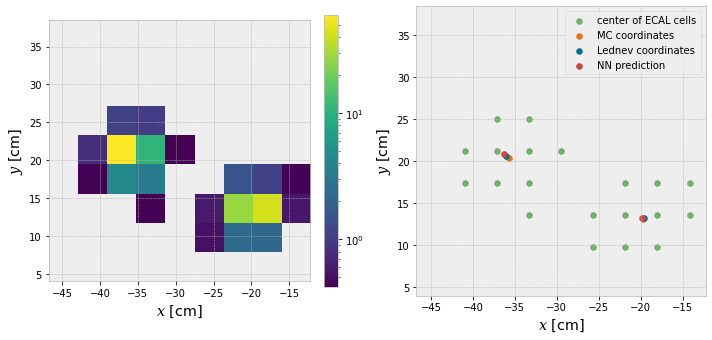

[80.07013577 80.00308069]


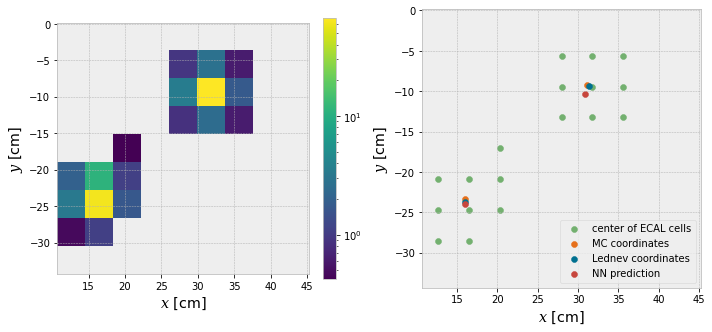

[80.05564675 80.00454625]


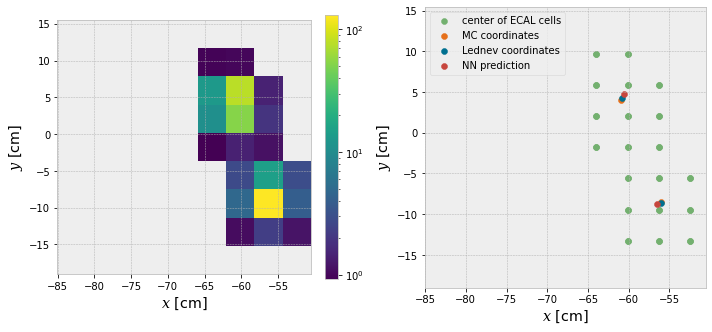

[80.05144737 80.08402993]


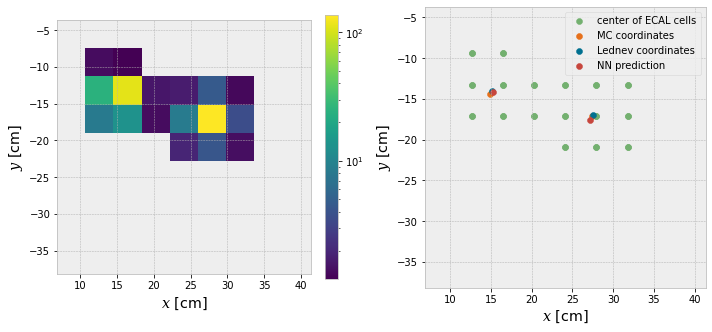

[80.02360993 80.08950019]


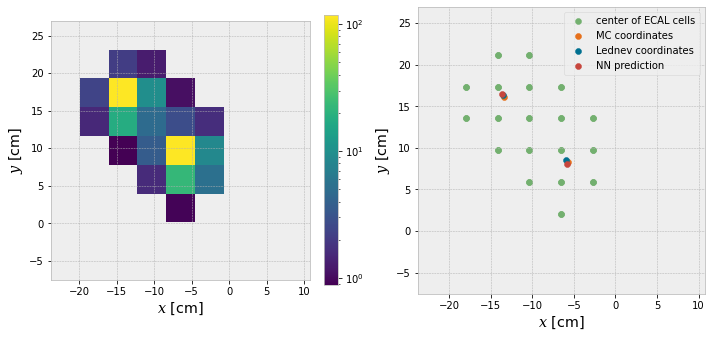

[80.09201485 80.06966598]


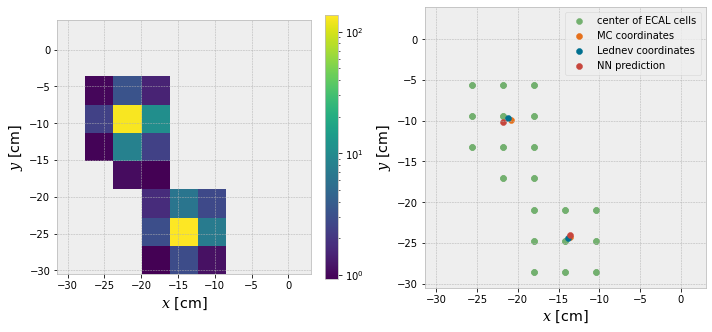

[80.07727979 80.00572542]


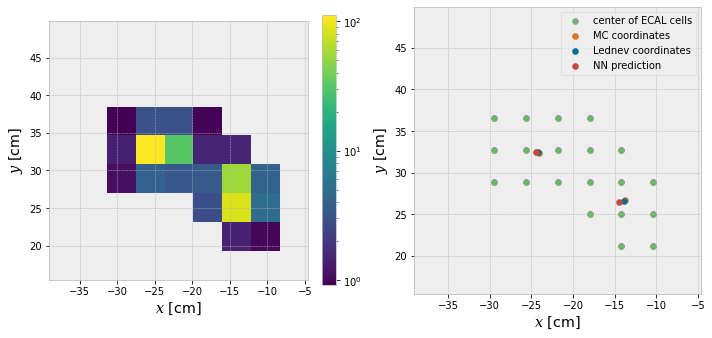

[80.05320595 80.01643358]


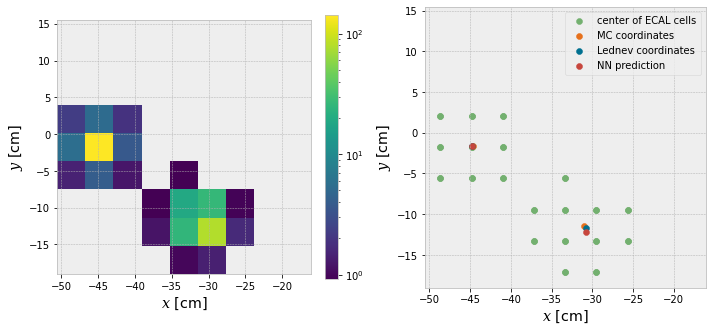

[80.00381622 80.04086435]


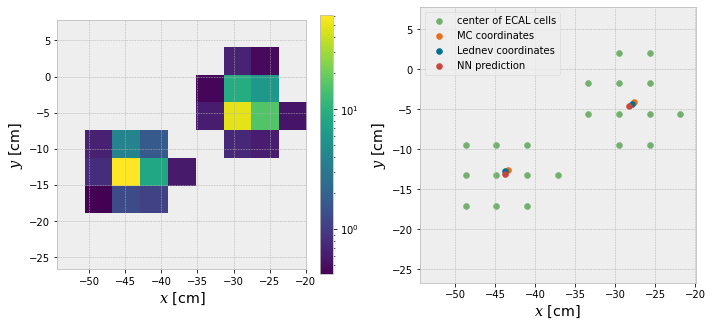

[80.01481818 80.09597768]


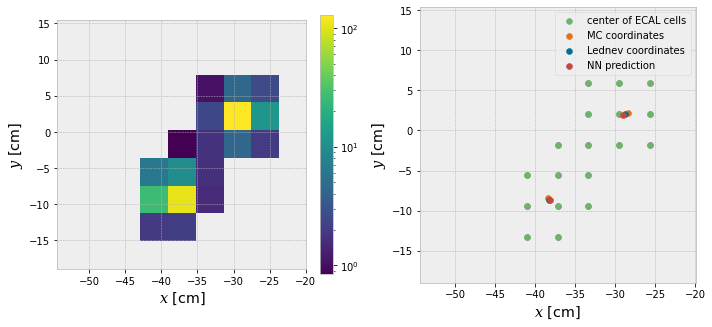

[80.09741044 80.01490772]


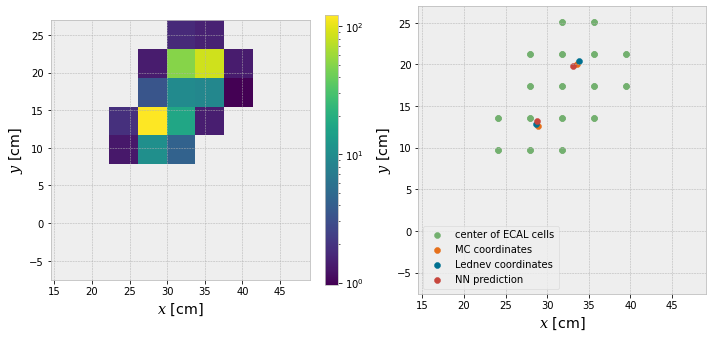

[80.0901695  80.06436393]


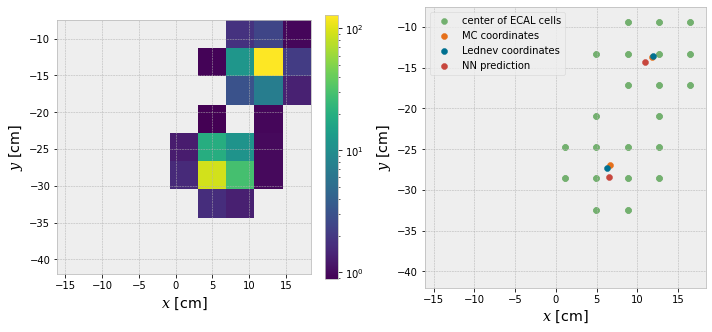

[80.06530793 80.06678525]


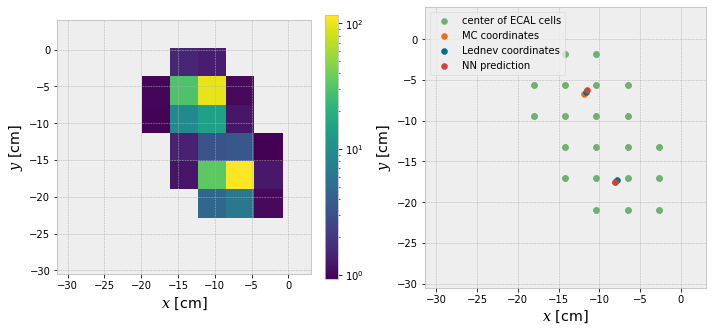

[80.0652831  80.02595723]


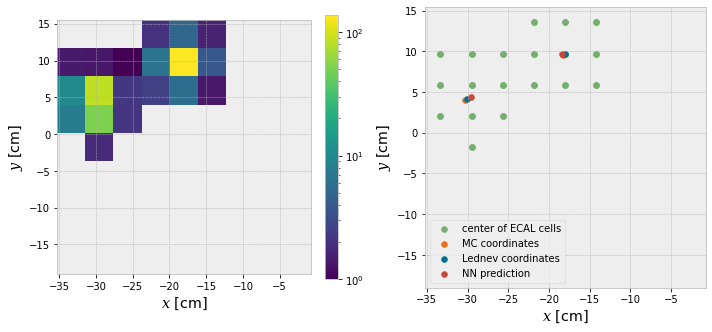

[80.01232416 80.04426024]


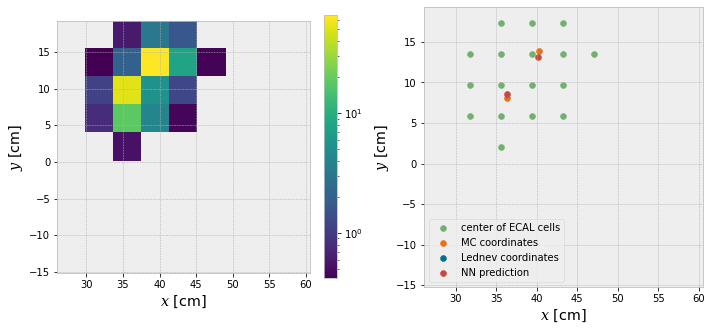

[80.07337193 80.021437  ]


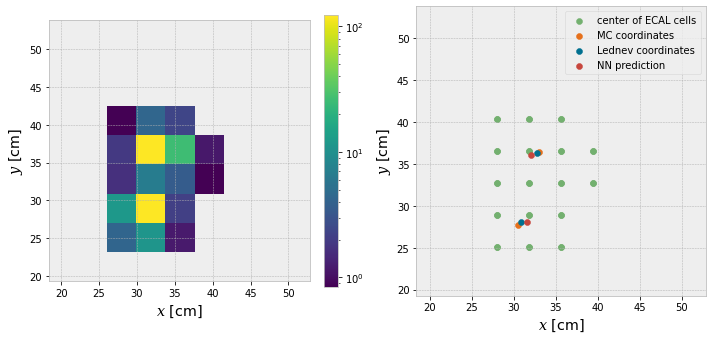

[80.05368713 80.03691793]


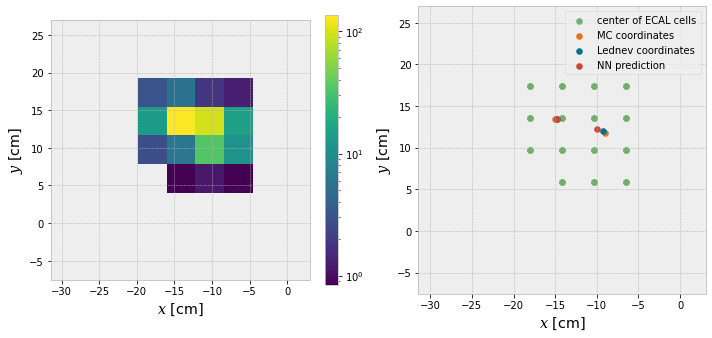

[80.04034291 80.08027651]


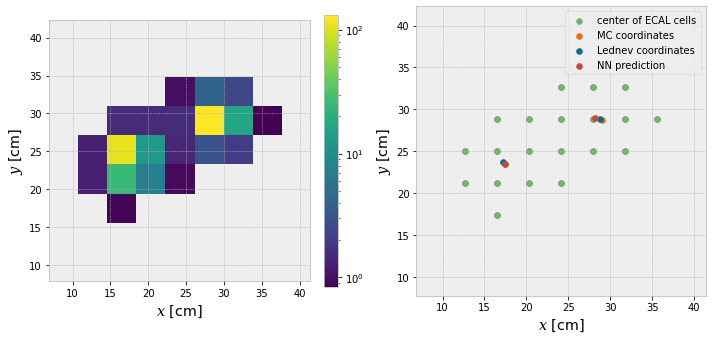

[80.08397576 80.0254006 ]


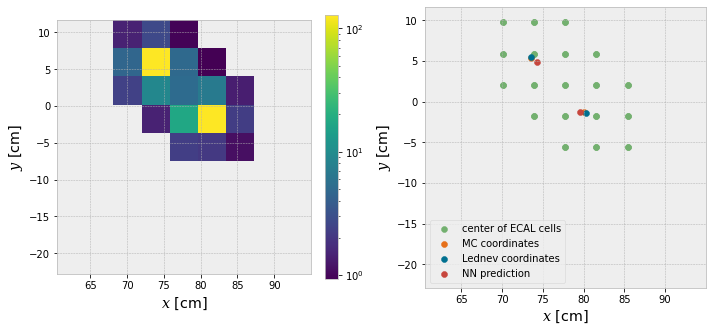

[80.09876786 80.09031929]


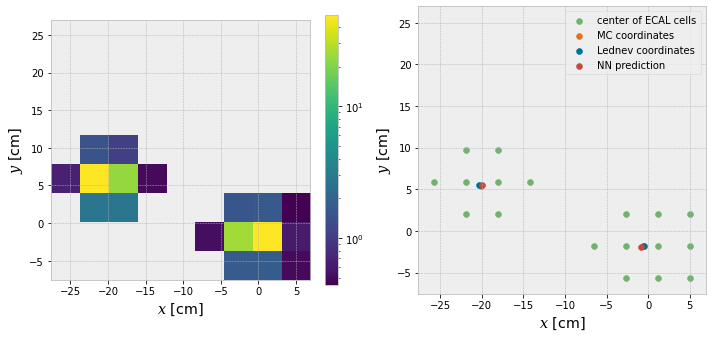

[80.01474407 80.07848009]


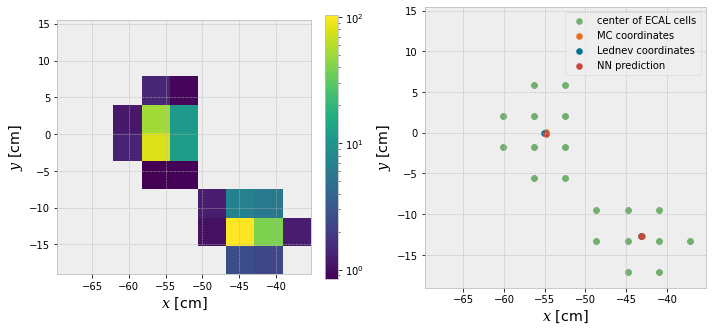

[80.07403841 80.00234522]


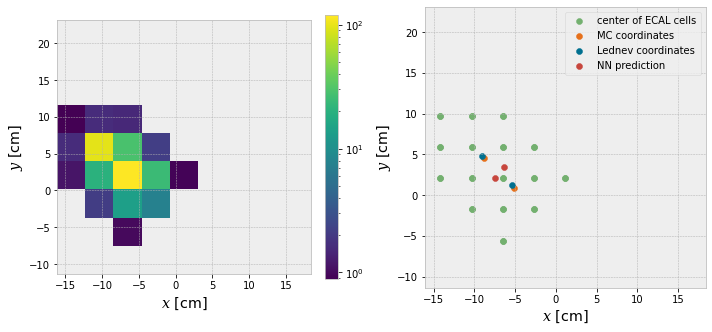

[80.054936   80.01505664]


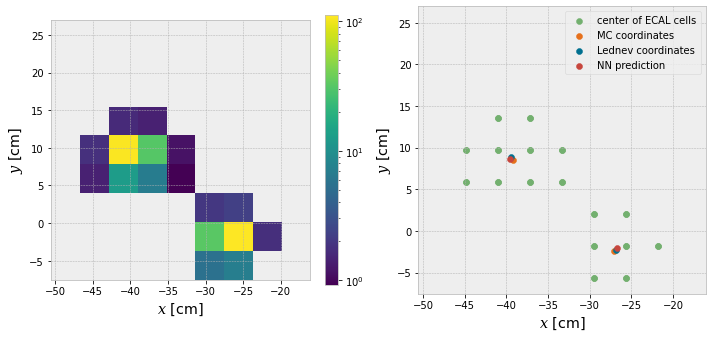

[80.06087101 80.05239361]


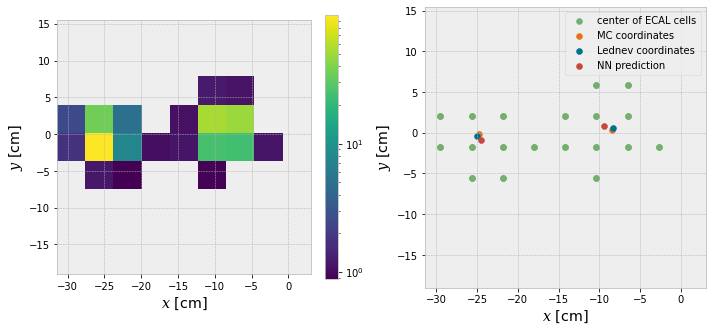

[80.06453583 80.08842938]


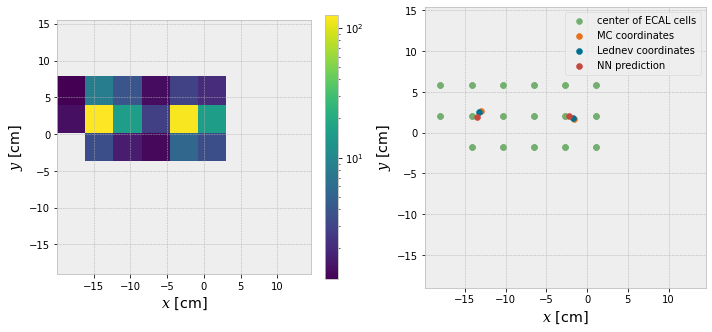

[80.0315534  80.02371726]


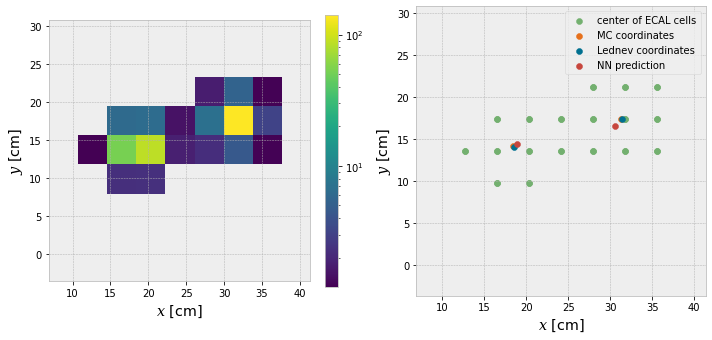

[80.02021574 80.0325613 ]


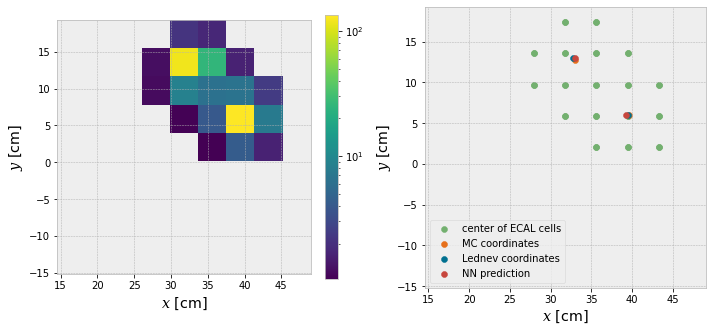

[80.01880592 80.03168858]


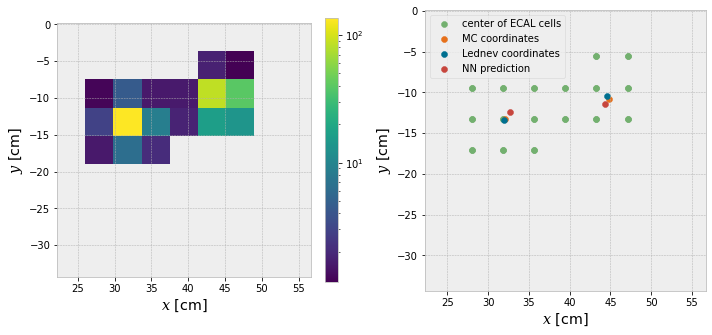

[80.03825727 80.03592312]


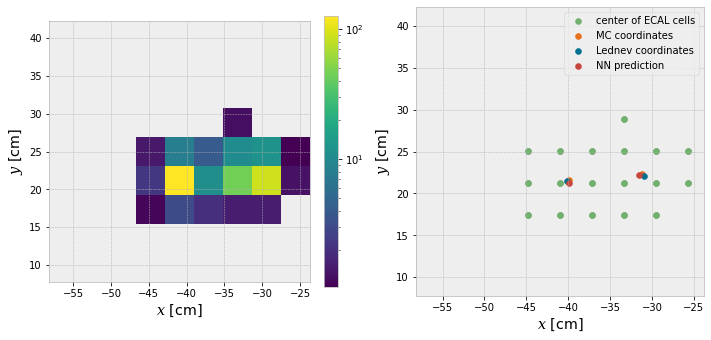

[80.09826709 80.04482064]


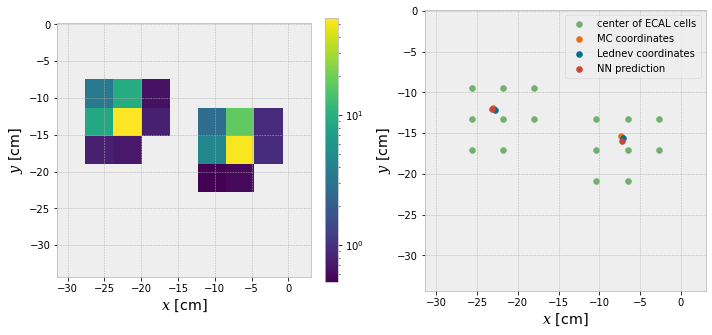

[80.08509972 80.0071974 ]


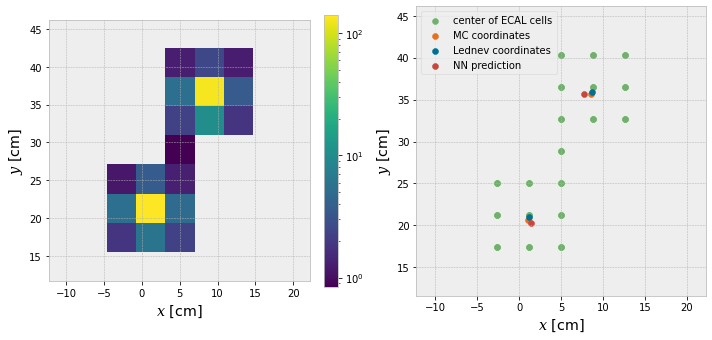

[80.00378511 80.0671377 ]


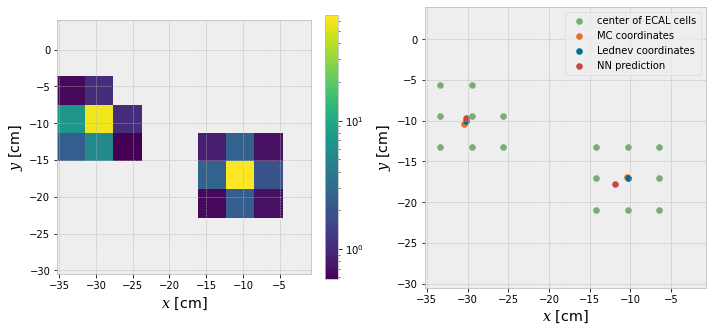

[80.03960789 80.09408326]


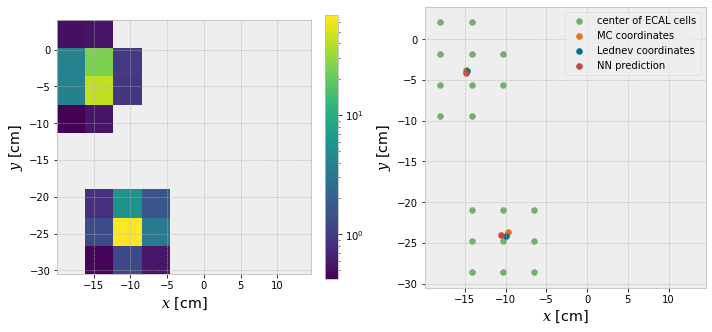

[80.02919303 80.09721358]


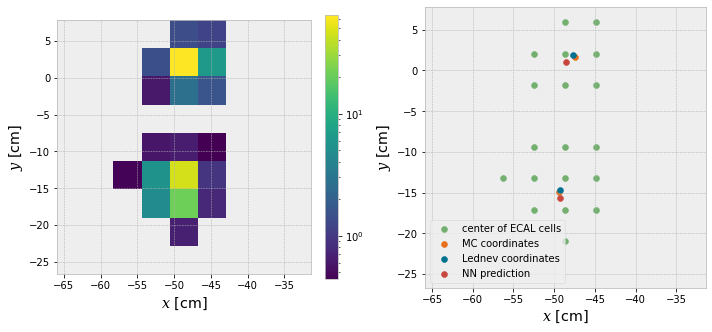

[80.07475951 80.01421077]


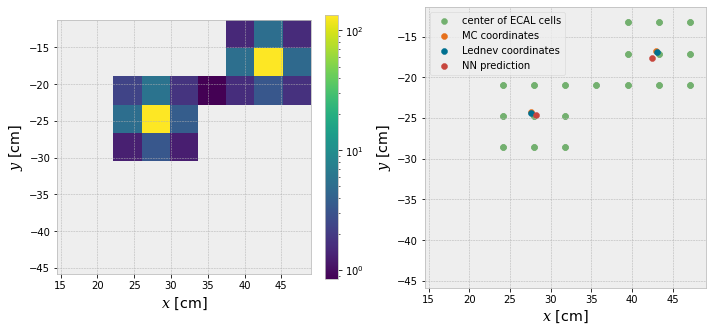

[80.03966537 80.08979336]


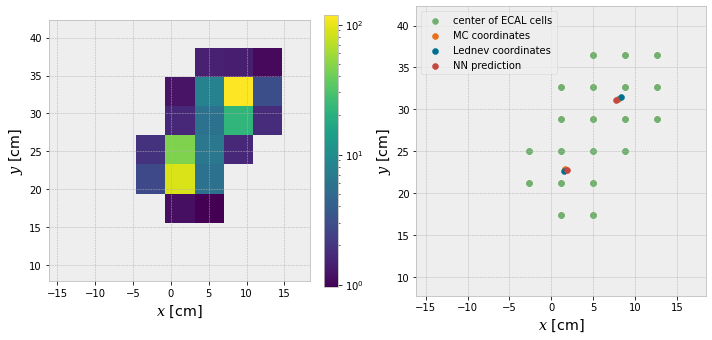

[80.03089652 80.08086629]


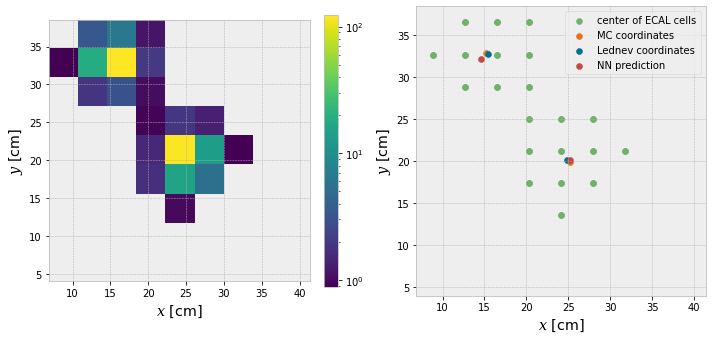

[80.06764565 80.04606591]


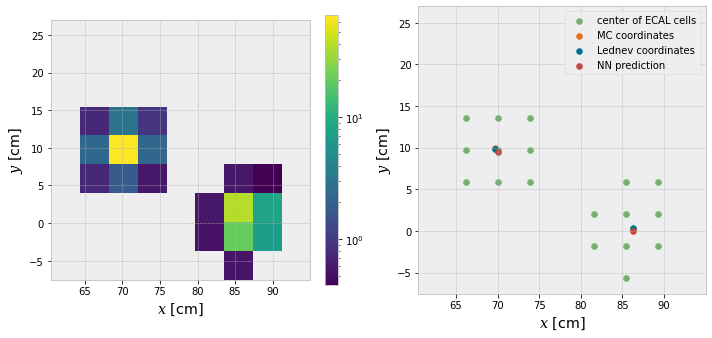

[80.09623188 80.05958743]


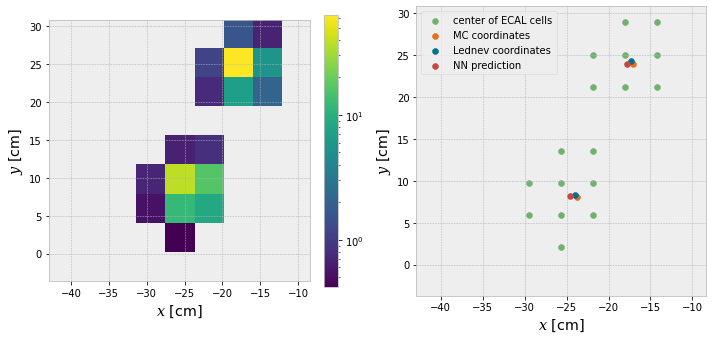

[80.03811057 80.0436908 ]


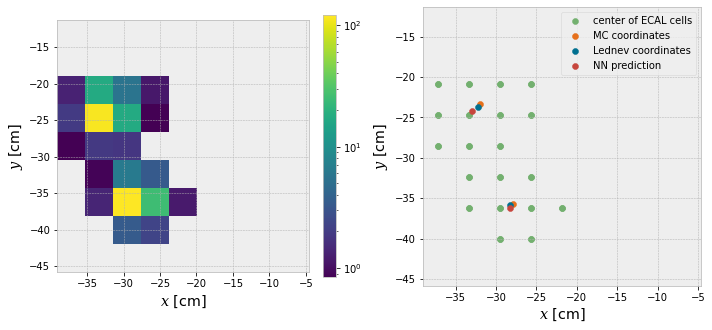

[80.03959157 80.03224921]


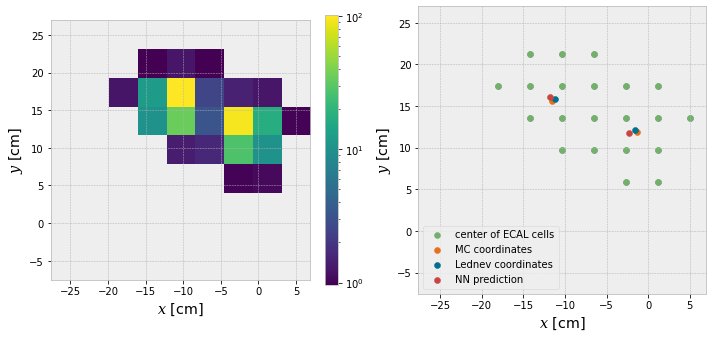

[80.08823696 80.01110264]


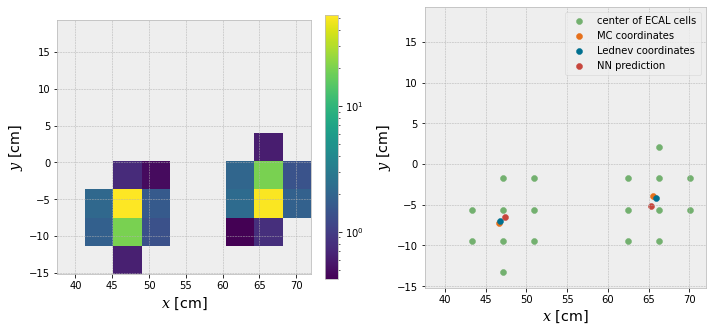

[80.01515783 80.05716087]


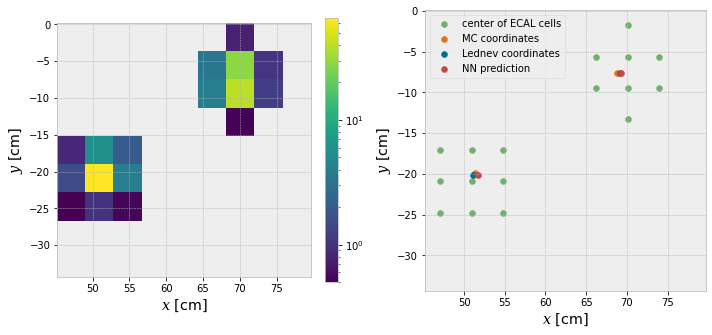

[80.05936764 80.00521401]


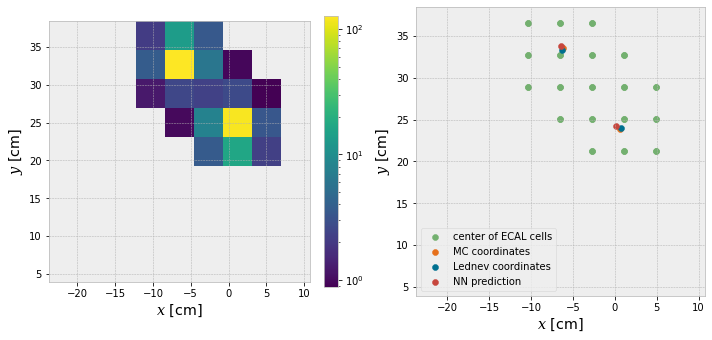

[80.01403294 80.01017798]


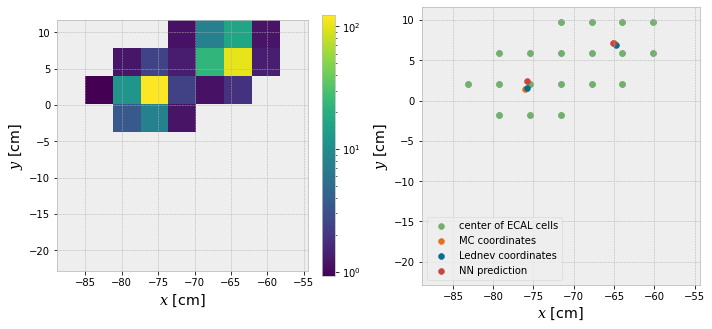

[80.06787894 80.09805791]


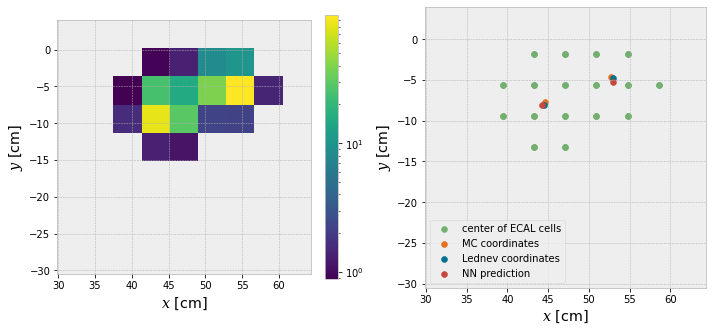

[80.0117837  80.07994244]


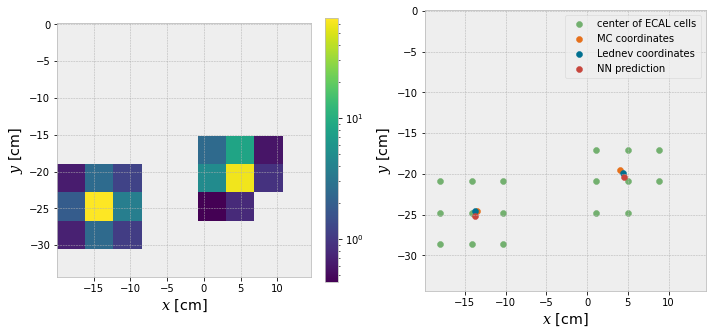

[80.01159735 80.01293655]


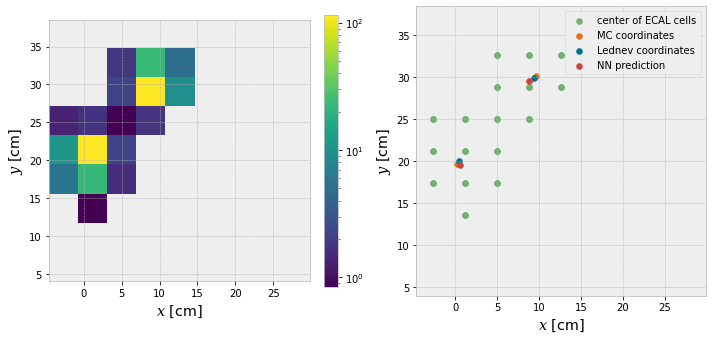

[80.07833476 80.03238649]


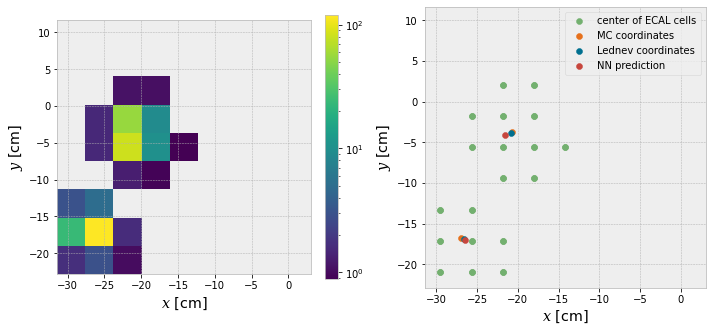

[80.0266222  80.05207921]


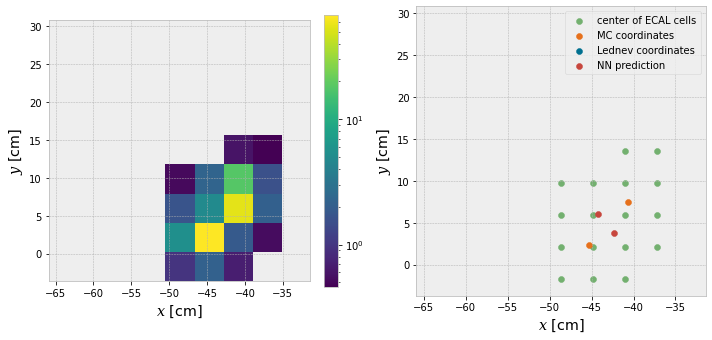

[80.03265381 80.05678791]


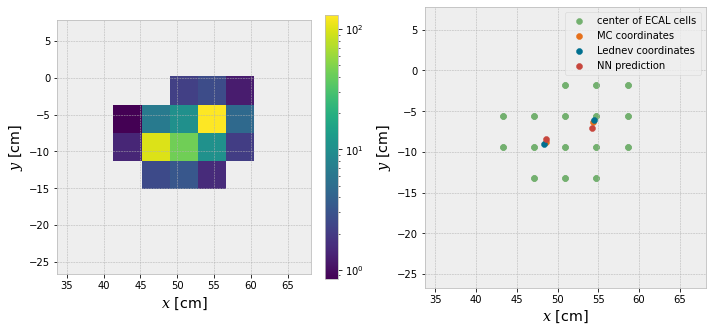

[80.00337658 80.04314062]


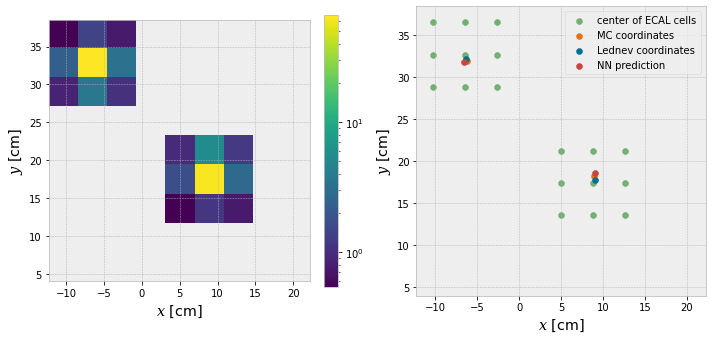

[80.09729621 80.01603532]


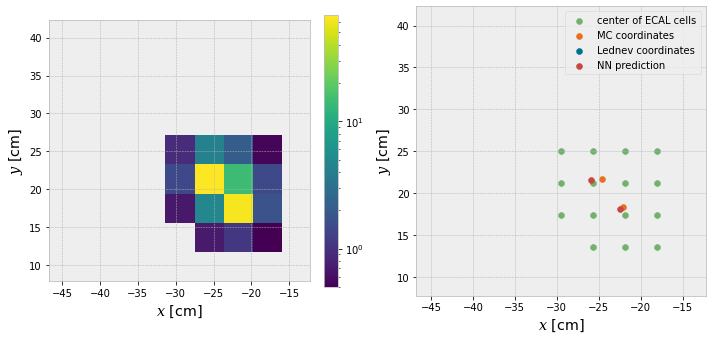

[80.06501857 80.08714158]


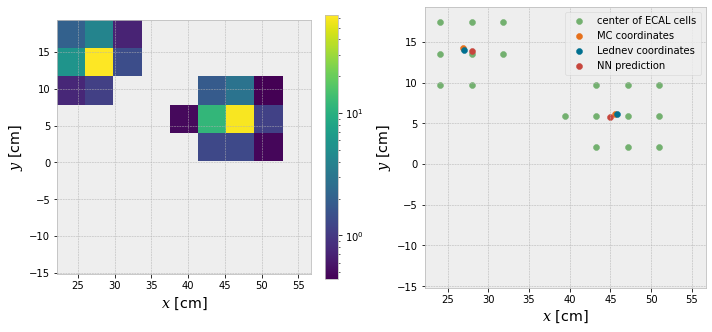

[80.00437519 80.02142811]


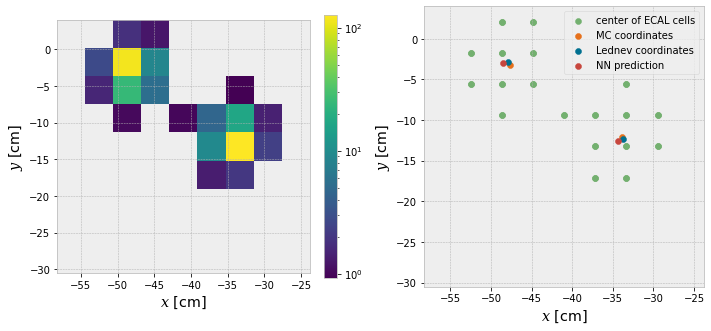

[80.09136798 80.03613337]


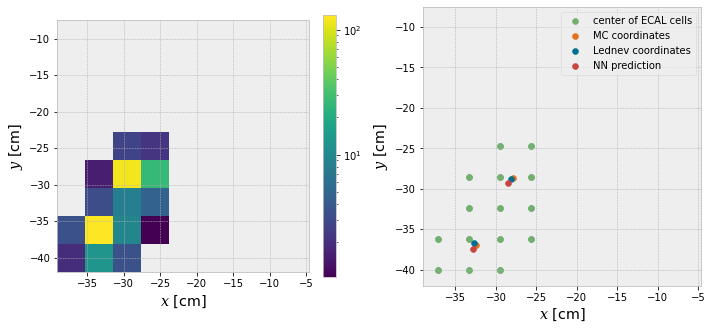

[80.07925631 80.05124693]


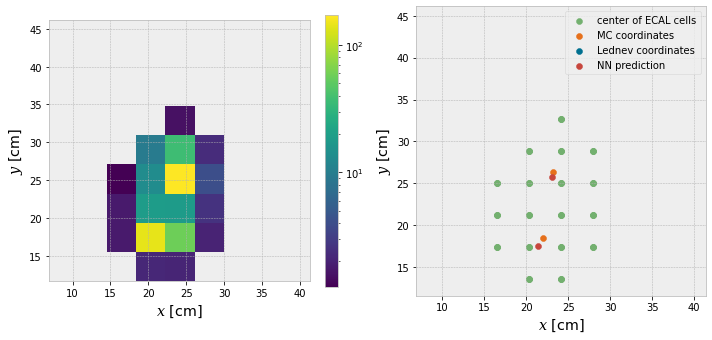

[80.00056516 80.06152979]


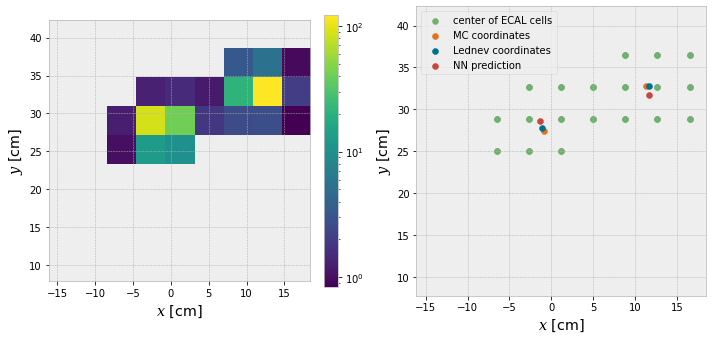

[80.06677971 80.00966036]


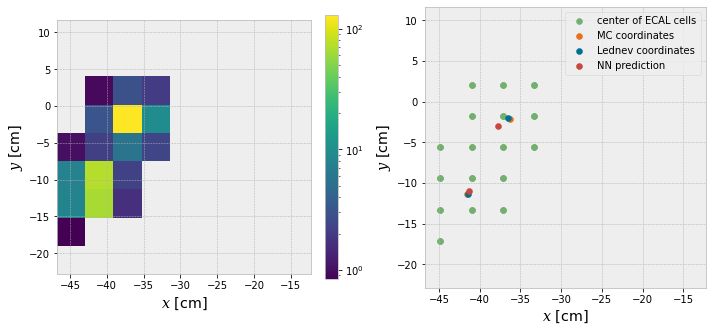

[80.06770428 80.0239467 ]


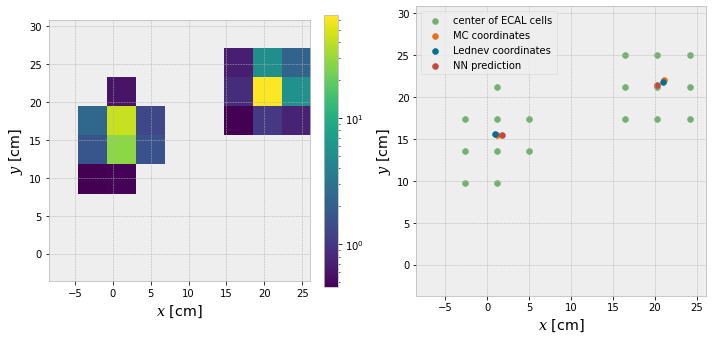

[80.03323269 80.04172981]


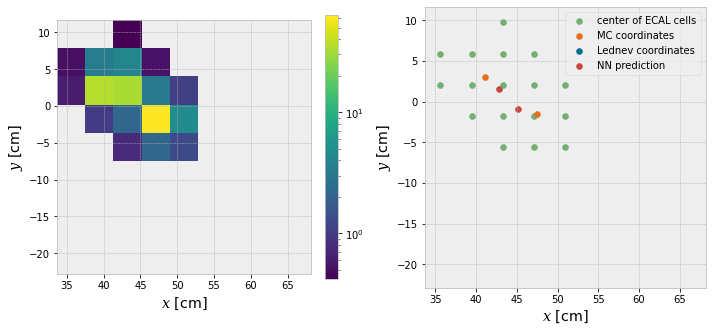

[80.00171189 80.0689272 ]


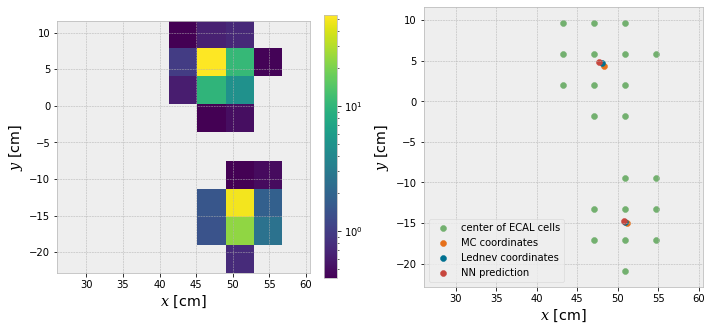

[80.0904836  80.07805484]


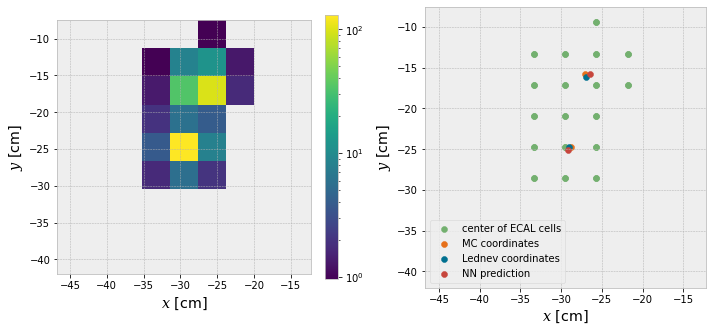

[80.01565798 80.06558282]


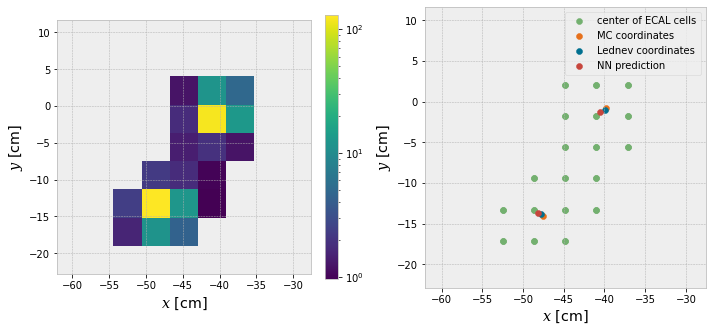

[80.04381015 80.09498561]


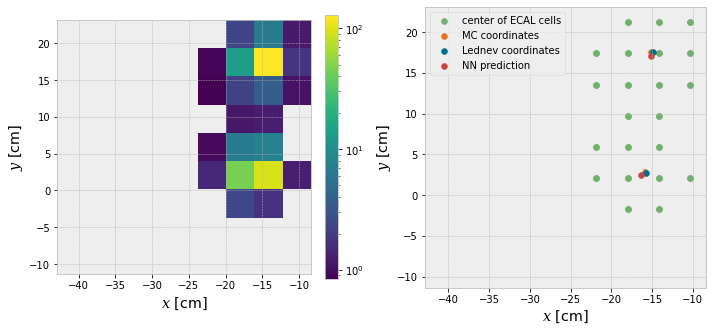

[80.02806707 80.0335226 ]


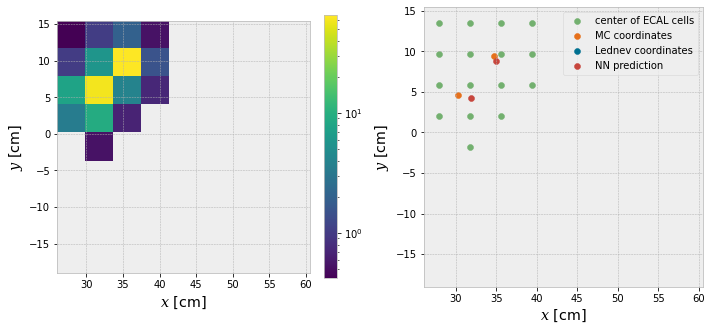

[80.07302153 80.08200593]


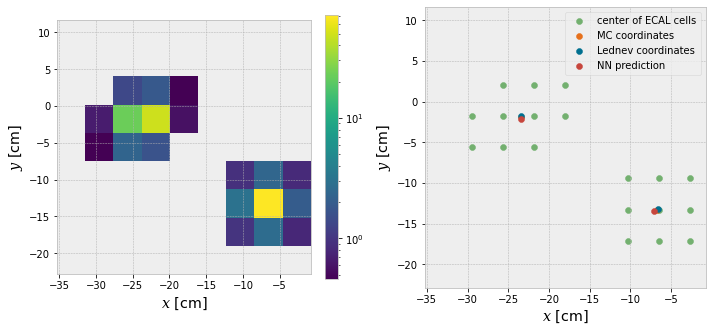

[80.04985284 80.095256  ]


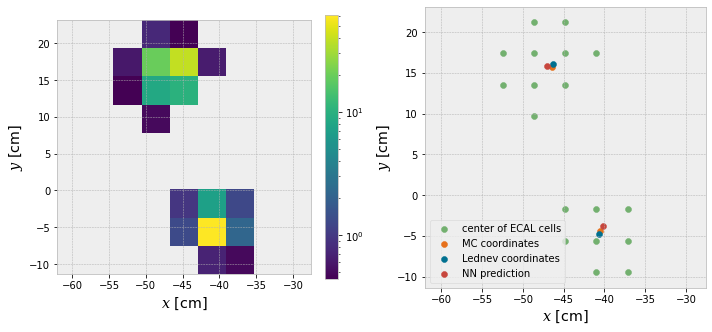

[80.06527866 80.05311954]


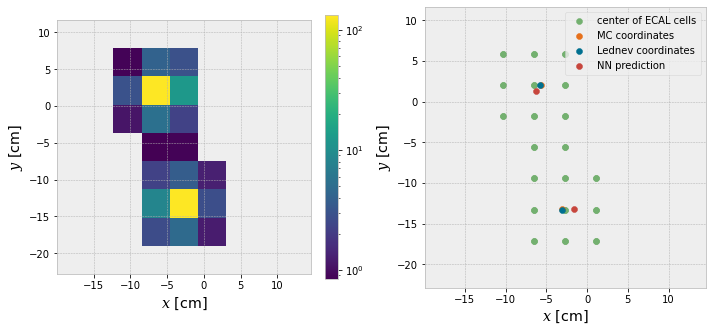

[80.08249162 80.03864843]


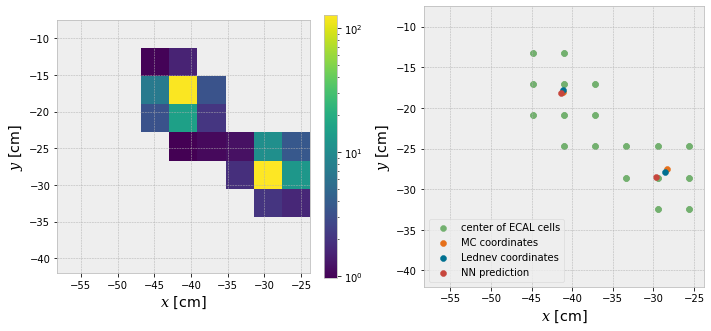

[80.06410021 80.08173727]


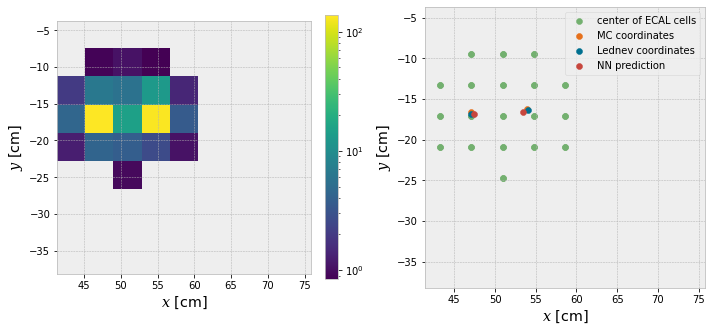

[80.09916168 80.0452298 ]


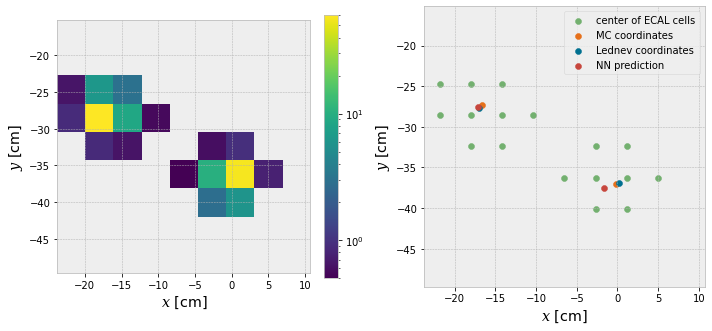

[80.04175885 80.0341277 ]


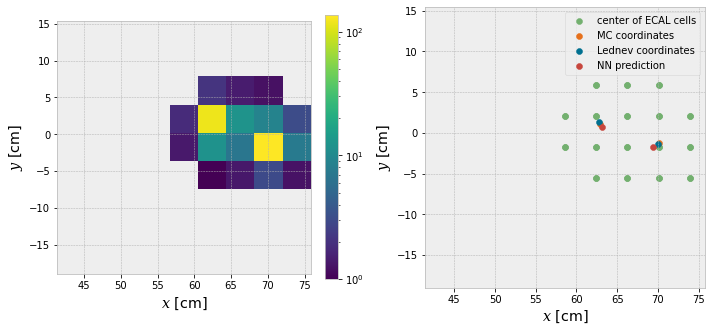

[80.06588465 80.06038391]


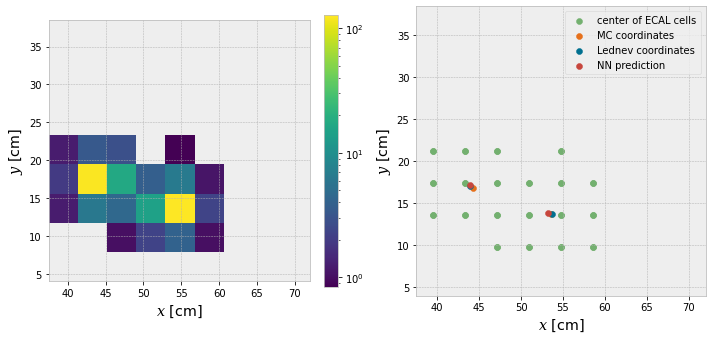

[80.05849484 80.00945077]


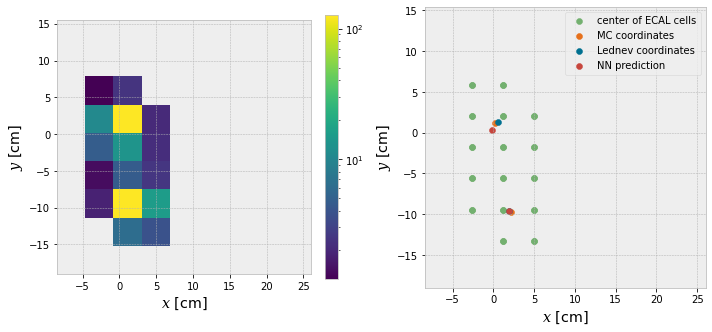

[80.09451386 80.06965326]


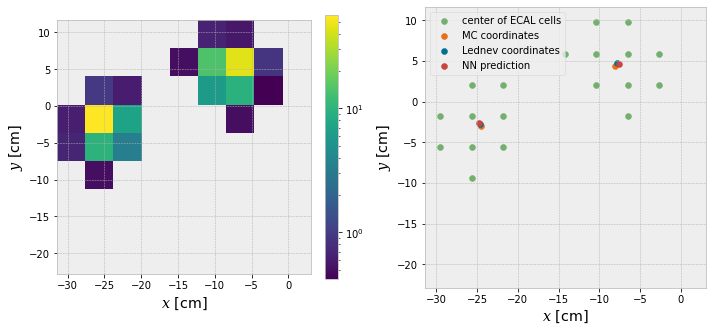

[80.00673642 80.02023306]


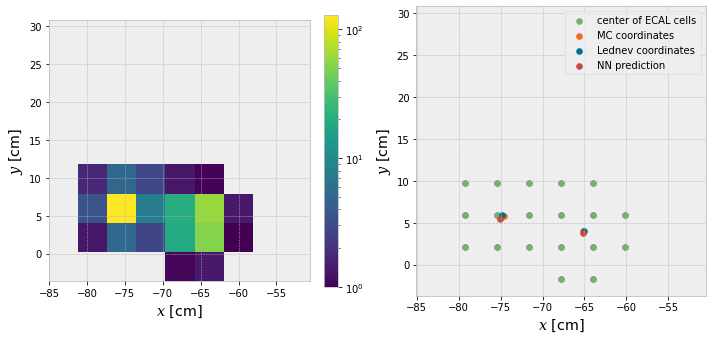

[80.01218301 80.02805754]


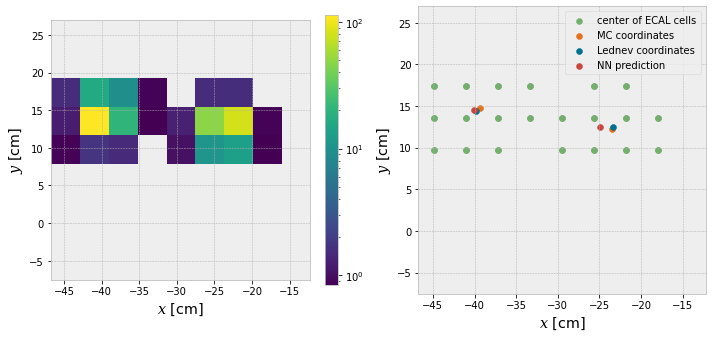

[80.00706119 80.02331812]


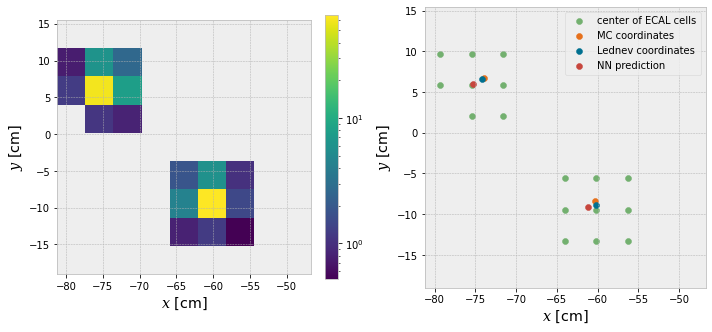

[80.01639636 80.02569215]


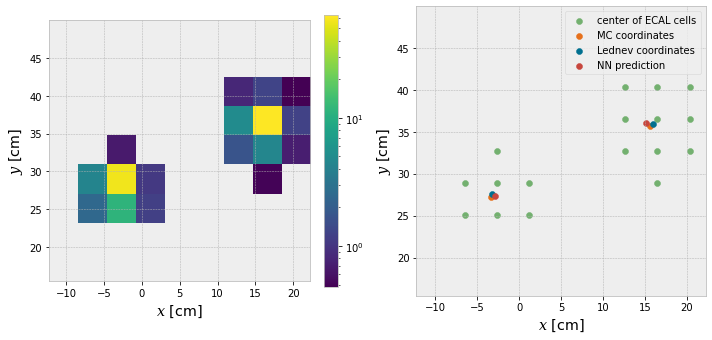

[80.03904665 80.05073519]


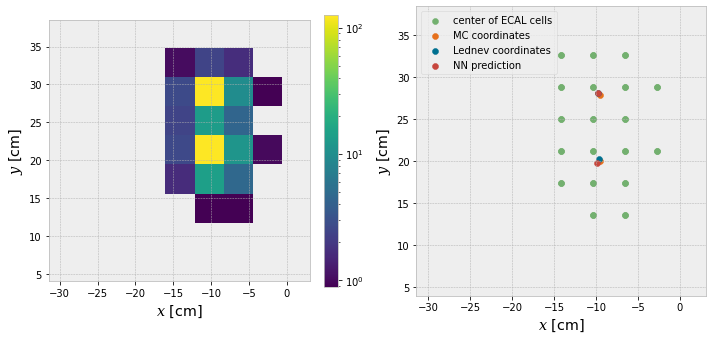

[80.00260614 80.05806524]


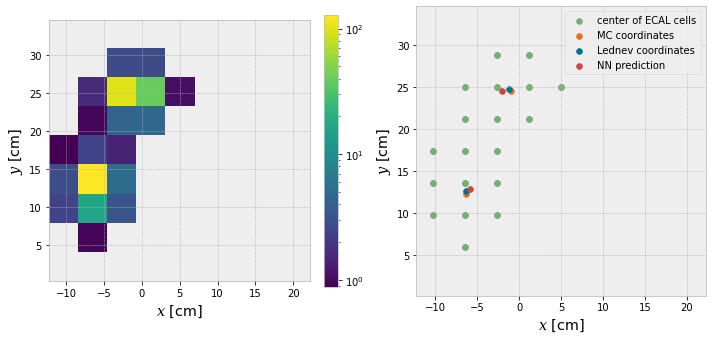

[80.08858982 80.00658403]


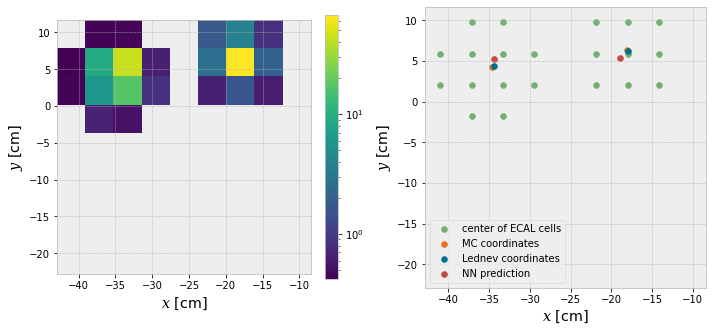

[80.08915411 80.02381804]


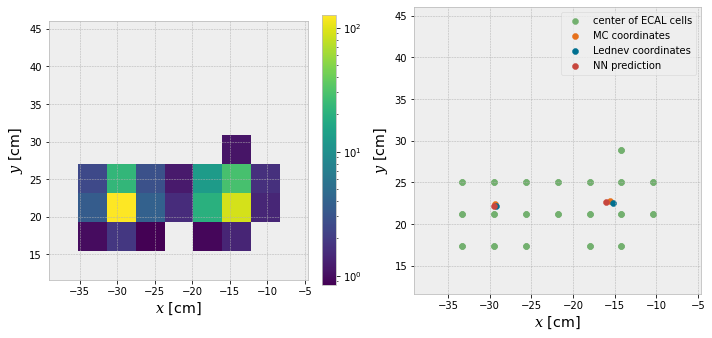

[80.08189256 80.02523925]


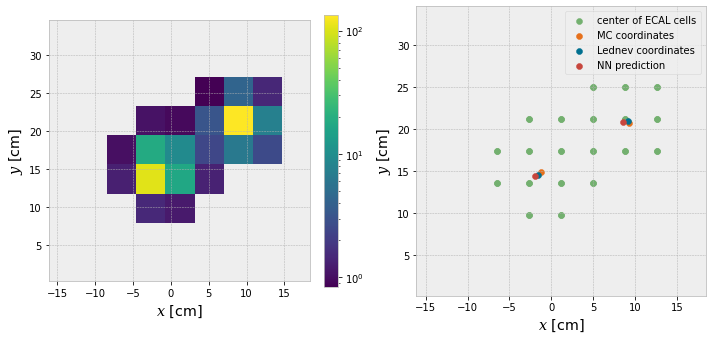

[80.0926497  80.03302447]


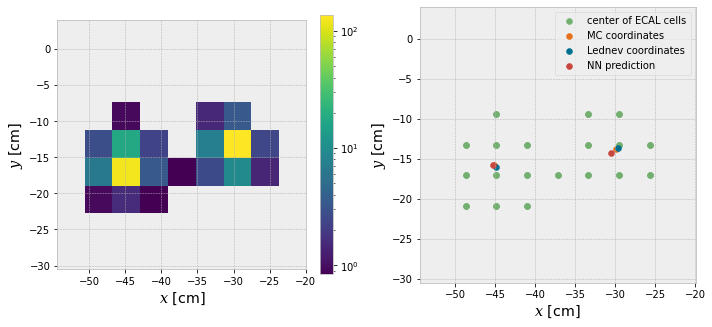

[80.08829482 80.04456203]


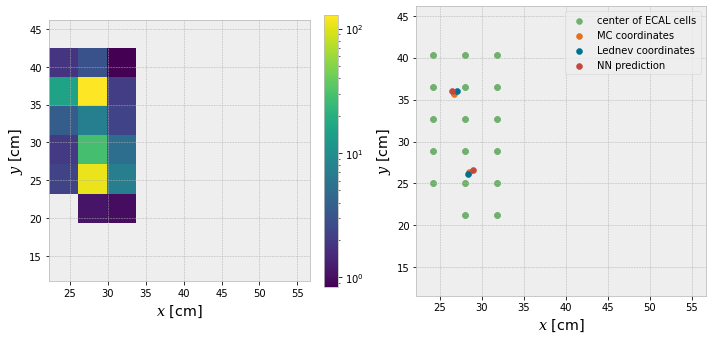

[80.04545928 80.06810331]


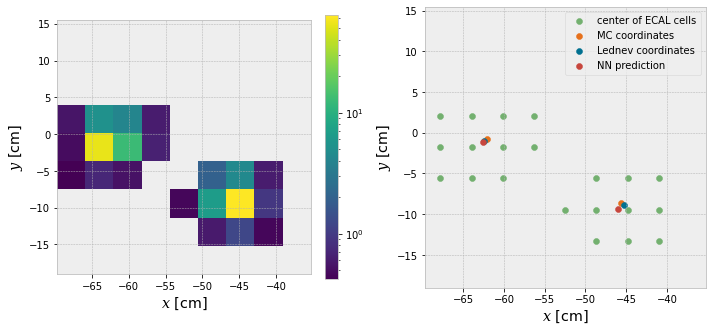

[80.07094612 80.02923322]


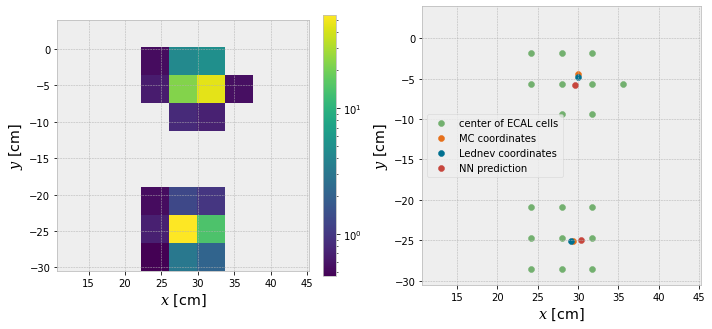

[80.09808849 80.06167603]


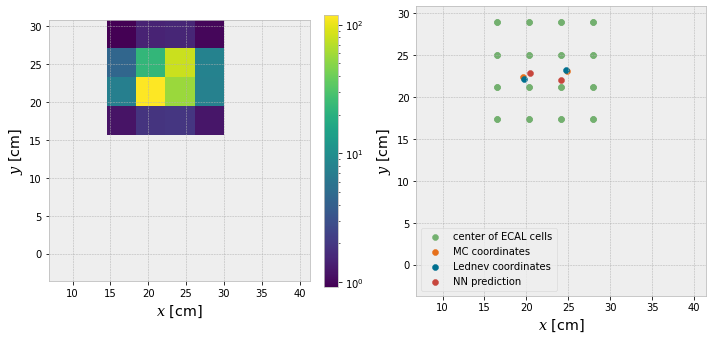

[80.0838627  80.01119915]


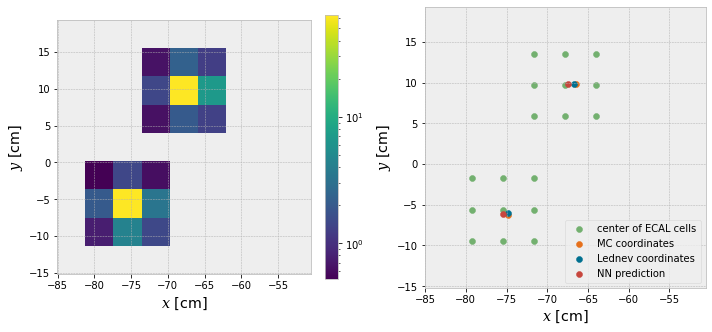

[80.02543946 80.00757719]


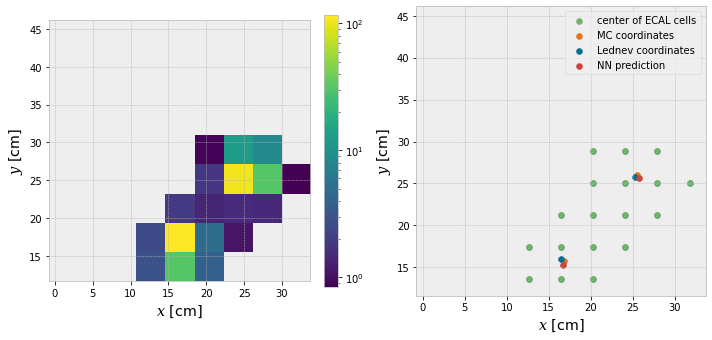

[80.04797031 80.03673089]


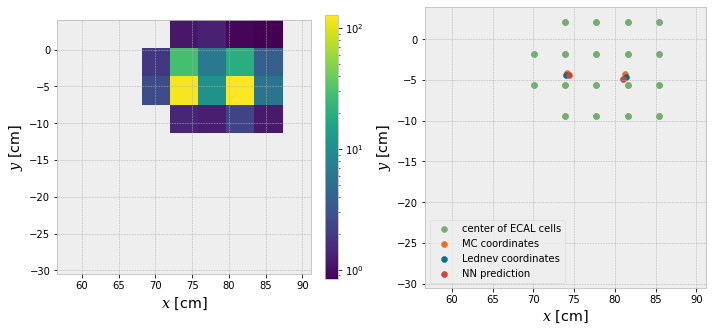

[80.0373103  80.07496308]


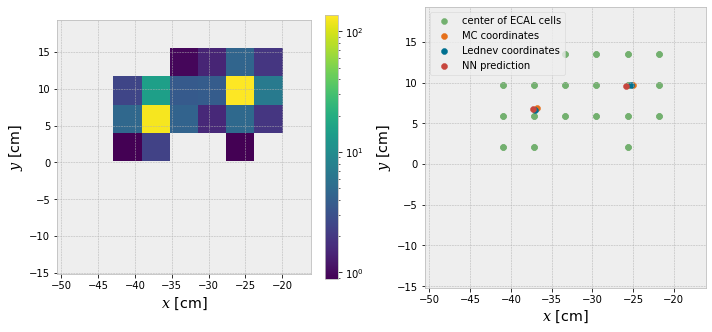

[80.02128342 80.04272401]


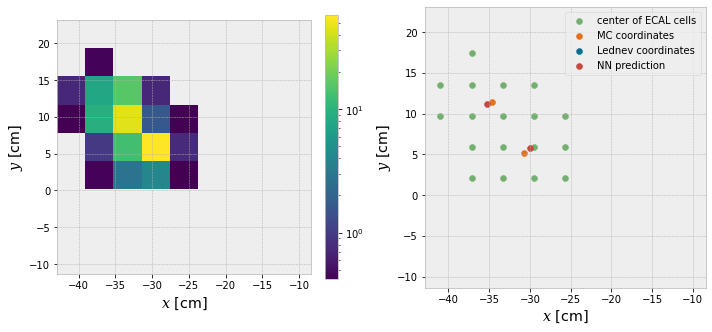

[80.07860044 80.01736889]


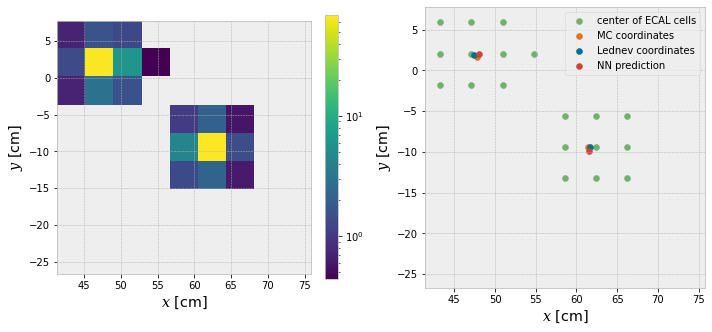

[80.08715007 80.04284956]


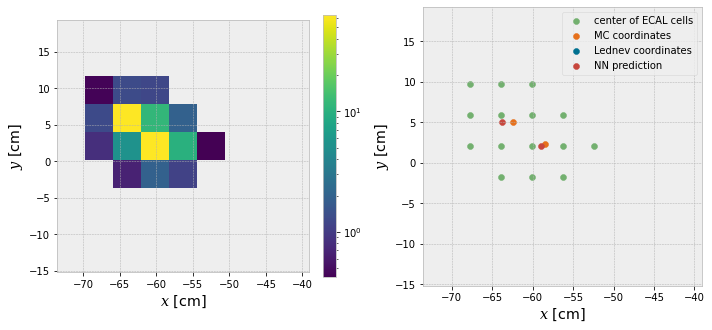

[80.0288975  80.00831067]


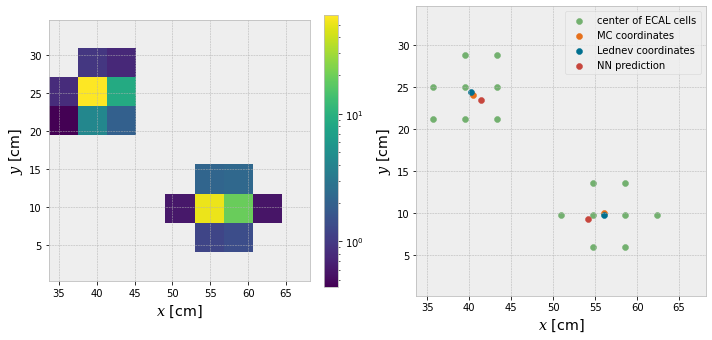

[80.06878612 80.00443806]


In [13]:
for i in range(100):
    ev.show_cluster_NNpred(i)
    print(ipd.E_truth_veri[i])

Okay das ist ja alles schon mal bissi besser!